1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

[[-0.10773158  2.21974271 -0.6489572  ...  0.18862696 -1.05688059
  -0.64490671]
 [ 6.51982999  2.48020061 -0.16385868 ... -1.95770966 -3.32545875
   2.06110488]
 [ 6.30436684  6.91968603 -1.46177307 ... -1.58045573 -5.43921993
   0.77129147]]
Eigenvalues:
 [2.94284492e+01 2.05857530e+00 1.63350791e-15]
Eigenvectors:
 [[-0.11390829  0.56600197 -0.81649658]
 [-0.57929972 -0.70551057 -0.40824829]
 [-0.80711631  0.42649338  0.40824829]]
-----------------------------

SVD Eigenvalues:
 [2.96056053e+01 2.05893164e+00 1.41725452e-31]
SVD Eigenvectors:
 [[-0.11407206  0.56596899 -0.81649658]
 [-0.57909555 -0.70567817 -0.40824829]
 [-0.80723968  0.42625981  0.40824829]]
-----------------------------

By selecting the component 0, we retain 93.46% of the total variability
By selecting the component 1, we retain 6.54% of the total variability
By selecting the component 2, we retain 0.00% of the total variability
-----------------------------

These percantages of total variability make sense,
be

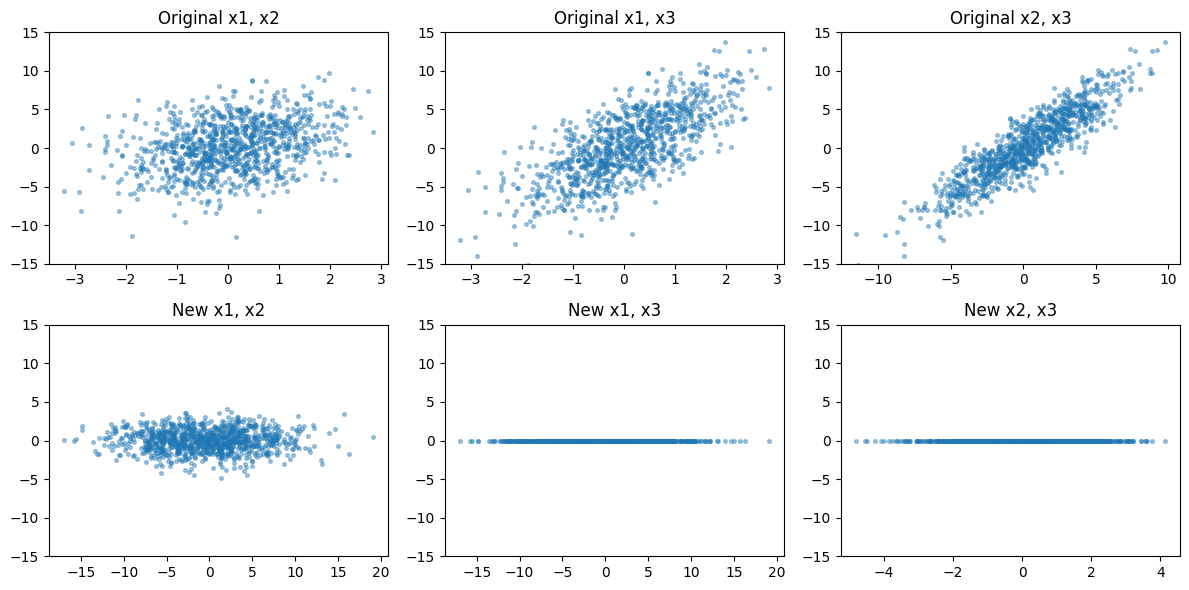

In [294]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

N= 1000
mu1, sigma1 = 0, 1
mu2, sigma2 = 0, 3

x1 = np.random.normal(mu1, sigma1, N)
x2 = x1 + np.random.normal(mu2, sigma2, N)
x3 = 2*x1 + x2
X = np.array([x1, x2, x3])
print(X)

covX = np.cov(X)
l, V = la.eig(covX)
idx = l.argsort()[::-1]
l = l[idx]
V = V[:,idx]

print("Eigenvalues:\n", np.real_if_close(l))
print("Eigenvectors:\n", V)
print("-----------------------------\n")
U, S, Vs = la.svd(X)
L = S**2/ (N-1)
print("SVD Eigenvalues:\n", L)
print("SVD Eigenvectors:\n", U)
print("-----------------------------\n")

Lambda = np.diag(np.real_if_close(l))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))
print("-----------------------------\n")
print("These percantages of total variability make sense,")
print("because x3 is totally based on other two variables and does not have any independent dispertion,")
print("so it was expected that one of the components has no effect on variation.")
print("-----------------------------\n")
print("For retain of more than 99% of dataset, obviously we should choose first and second components.\n\n")


Xp = np.dot(V.T, X)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X[0], X[1], alpha = 0.4, s=7)
ax01.set_title('Original x1, x2')
ax02.scatter(X[0], X[2], alpha = 0.4, s=7)
ax02.set_title('Original x1, x3')
ax03.scatter(X[1], X[2], alpha = 0.4, s=7)
ax03.set_title('Original x2, x3')

ax11.scatter(Xp[0], Xp[1], alpha = 0.4, s=7)
ax11.set_title('New x1, x2')
ax12.scatter(Xp[0], Xp[2], alpha = 0.4, s=7)
ax12.set_title('New x1, x3')
ax13.scatter(Xp[1], Xp[2], alpha = 0.4, s=7)
ax13.set_title('New x2, x3')

plt.setp(axes,ylim=[-15, 15])
plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

SVD Eigenvalues (with Noise):
 [2.96056147e+01 2.05894417e+00 1.24576445e-03 1.22144175e-03
 1.15025380e-03 1.11748651e-03 1.09575016e-03 1.06982602e-03
 1.03347770e-03 1.00323141e-03 9.55885831e-04 9.40168001e-04
 4.51279911e-31] 

Comparing to the former section, we see that three eigenvalues are almost same,
and other eigenvalues (corresponding the noise), are so much smaller than main components.
-----------------------------

SVD Eigenvectors (with Noise):
 [[-1.14072056e-01  5.65967239e-01 -4.68108712e-04 -2.54193766e-05
   4.56307865e-04 -8.42152508e-04  5.12216571e-04 -6.42215003e-04
   2.97772245e-04 -1.20366066e-04 -6.41117856e-05 -2.53529439e-04
  -8.16496581e-01]
 [-5.79095448e-01 -7.05676157e-01  3.82364447e-04  2.55566384e-05
  -4.09157224e-04  1.07852460e-03 -7.03807911e-04  6.78632103e-04
  -3.96674844e-04  1.49927940e-04  2.81625483e-04  5.13580084e-04
  -4.08248290e-01]
 [-8.07239560e-01  4.26258321e-01 -5.53852978e-04 -2.52821148e-05
   5.03458506e-04 -6.05780413e-04

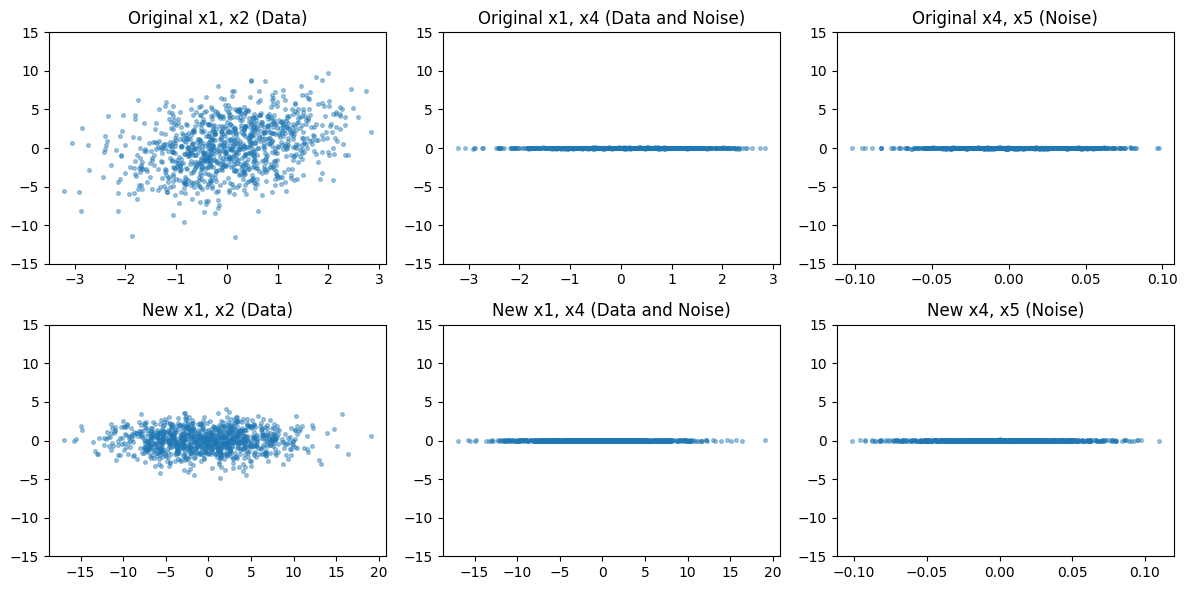

In [298]:
N= 1000
mu, sigma = 0, 1/30

noise = np.random.normal(mu, sigma, (10, N))
X2 = np.concatenate((X, noise), axis=0)

U, S, Vs = la.svd(X2)
L = S**2/(N-1)
print("SVD Eigenvalues (with Noise):\n", L, "\n")
print("Comparing to the former section, we see that three eigenvalues are almost same,")
print("and other eigenvalues (corresponding the noise), are so much smaller than main components.")
print("-----------------------------\n")

print("SVD Eigenvectors (with Noise):\n", U)
print("-----------------------------\n")

Lambda = np.diag(np.real_if_close(L))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))
print("By selecting the component 3, we retain %.2f%% of the total variability" % (Lambda[3, 3]/Lambda.trace()*100))
print("By selecting the component 4, we retain %.2f%% of the total variability" % (Lambda[3, 3]/Lambda.trace()*100))
print()

Xp = np.dot(U.T, X2)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X2[0], X2[1], alpha = 0.4, s=7)
ax01.set_title('Original x1, x2 (Data)')
ax02.scatter(X2[0], X2[3], alpha = 0.4, s=7)
ax02.set_title('Original x1, x4 (Data and Noise)')
ax03.scatter(X2[3], X2[4], alpha = 0.4, s=7)
ax03.set_title('Original x4, x5 (Noise)')

ax11.scatter(Xp[0], Xp[1], alpha = 0.4, s=7)
ax11.set_title('New x1, x2 (Data)')
ax12.scatter(Xp[0], Xp[3], alpha = 0.4, s=7)
ax12.set_title('New x1, x4 (Data and Noise)')
ax13.scatter(Xp[3], Xp[4], alpha = 0.4, s=7)
ax13.set_title('New x4, x5 (Noise)')

plt.setp(axes,ylim=[-15, 15])
plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

SVD Eigenvalues:
 [9.0889388e+05 7.9932383e+04 3.9685289e+04 2.5484555e+04 1.5638602e+04
 8.2561660e+03 2.2343481e+03 1.0739555e+01 6.6357893e-01 8.0474569e-03] 

-----------------------------
SVD Eigenvectors:
 [[-2.66209126e-01 -2.37027973e-01 -6.48084208e-02  8.45567286e-01
   1.97038278e-01 -2.03094836e-02  3.38391066e-01 -3.87758180e-03
   2.47960398e-03  5.47292075e-05]
 [-1.08402193e-01 -8.28299075e-02  2.48737708e-02  3.16061914e-01
   1.86346211e-02  2.37993542e-02 -9.37935293e-01 -1.40158441e-02
   6.44919695e-03  9.01685416e-05]
 [-1.24913771e-02  1.91977783e-03  1.42310571e-03  8.69227387e-03
  -9.34350491e-03 -2.06994489e-04 -1.18965209e-02  9.82829213e-01
  -1.83176205e-01 -5.18923625e-03]
 [-1.50702195e-03  7.18476251e-04  1.29736809e-03 -1.98083743e-03
  -4.74005844e-03 -8.44198003e-05  2.84025678e-03  1.59867808e-01
   8.43317389e-01  5.13049424e-01]
 [-8.50661425e-04  3.99157143e-04  7.39456853e-04 -1.15795468e-03
  -2.71812594e-03 -4.93254374e-05  1.68927701e-03  8.9

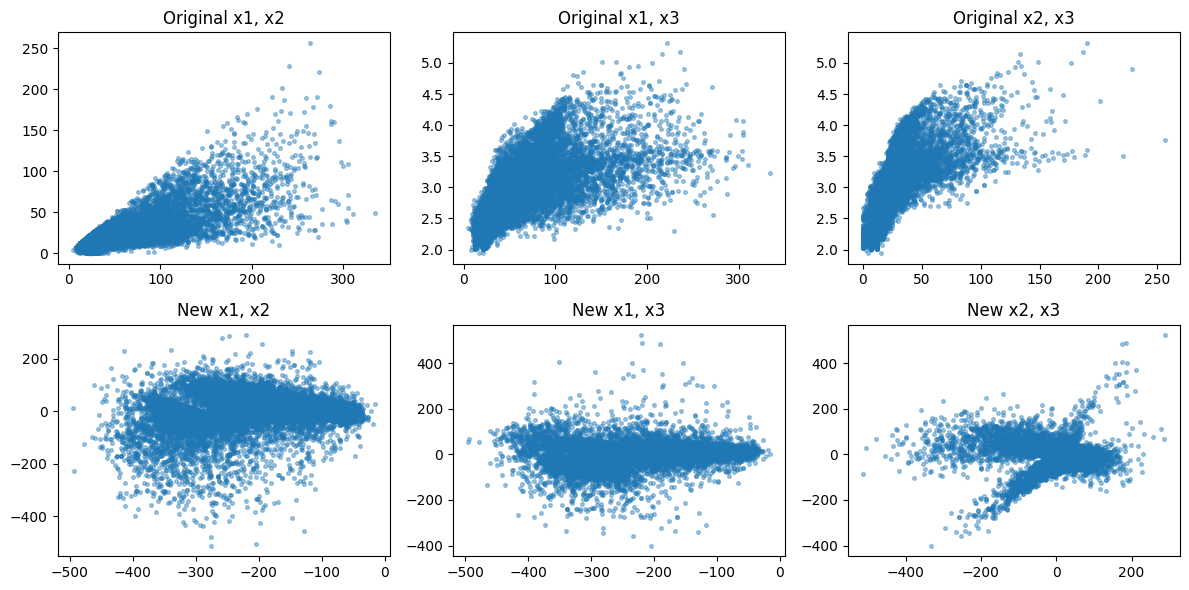

In [334]:
magic_data = pd.read_csv('magic04.data', header=None)
data = magic_data.to_numpy()
data = data[:,:-1]
d = np.asarray(data, dtype='float32')
d = d.T

U, S, V = la.svd(d)
L = S**2/(N-1)
print("SVD Eigenvalues:\n", L, "\n")
print("-----------------------------")
print("SVD Eigenvectors:\n", U)
print("-----------------------------\n")

Lambda = np.diag(np.real_if_close(L))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))
print("By selecting the component 3, we retain %.2f%% of the total variability" % (Lambda[3, 3]/Lambda.trace()*100))
print("By selecting the component 4, we retain %.2f%% of the total variability" % (Lambda[4, 4]/Lambda.trace()*100))
print("By selecting the component 5, we retain %.2f%% of the total variability" % (Lambda[5, 5]/Lambda.trace()*100))
print("By selecting the component 6, we retain %.2f%% of the total variability" % (Lambda[6, 6]/Lambda.trace()*100))
print("By selecting the component 7, we retain %.2f%% of the total variability" % (Lambda[7, 7]/Lambda.trace()*100))
print("By selecting the component 8, we retain %.2f%% of the total variability" % (Lambda[8, 8]/Lambda.trace()*100))
print("By selecting the component 9, we retain %.2f%% of the total variability" % (Lambda[9, 9]/Lambda.trace()*100))
print()

d_pca = np.dot(U.T, d)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(d[0], d[1], alpha = 0.4, s=7)
ax01.set_title('Original x1, x2')
ax02.scatter(d[0], d[2], alpha = 0.4, s=7)
ax02.set_title('Original x1, x3')
ax03.scatter(d[1], d[2], alpha = 0.4, s=7)
ax03.set_title('Original x2, x3')

ax11.scatter(d_pca[0], d_pca[1], alpha = 0.4, s=7)
ax11.set_title('New x1, x2')
ax12.scatter(d_pca[0], d_pca[2], alpha = 0.4, s=7)
ax12.set_title('New x1, x3')
ax13.scatter(d_pca[1], d_pca[2], alpha = 0.4, s=7)
ax13.set_title('New x2, x3')

plt.tight_layout()
plt.show()